# Study the ratio of calibrated spectra
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS FRANCE
- creation date   : 18th October 2017





In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

AnaCalibratedSpectraRatio
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/ana_30may17/HD111980


In [4]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

### PySynphot

In [6]:
os.environ['PYSYN_CDBS']

'/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs'

In [7]:
import pysynphot as S

In [8]:
 from scipy import interpolate

In [9]:
import datetime
from datetime import timedelta
from dateutil import parser  # very usefull time format smart parser

In [10]:
import matplotlib as mpl
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [11]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [12]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days=mdates.DayLocator()  # every day
hour=mdates.HourLocator()  # every day
yearsFmt = mdates.DateFormatter('%Y')

# Initialisation

## Steering 

In [13]:
ShowInputSpectra=False

## Input fits file

- containing the calibrated spectra

In [14]:
inputdir="./spectrum_calibspec"
MIN_IMGNUMBER=58
MAX_IMGNUMBER=190
date="20170530"
object_name='HD111980'
tag = "calibSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output directory

In [15]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./study_calibspec"
ensure_dir(outputdir)

# Open input file

In [16]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [17]:
all_dates,all_airmass,all_titles,all_header,all_expo, all_leftspectra_data,all_rightspectra_data, all_leftspectra_data_stat_err , all_rightspectra_data_stat_err ,all_leftspectra_wl,all_rightspectra_wl,all_filt,all_filt1,all_filt2=BuildCalibSpec(sorted_files,sorted_numbers,object_name)

# Airmasses

In [18]:
all_airmass=np.array(all_airmass)

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


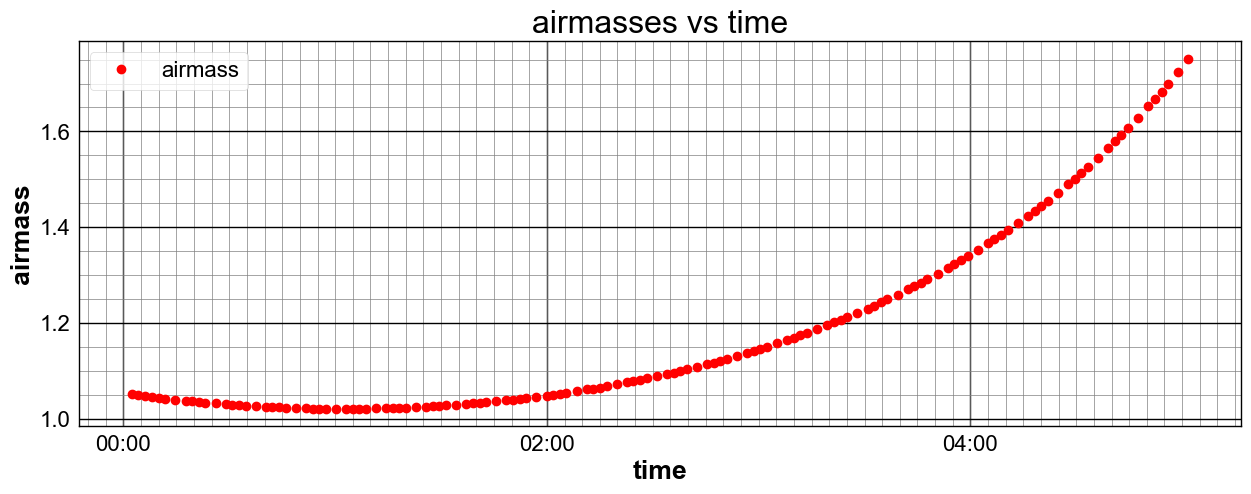

In [19]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

# Disperser Sorting

In [20]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [21]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [  2   7  12  17  22  27  32  37  42  47  52  57  62  67  72  77  82  87
  92  97 102 107 112 117 122 127 132]
dia Thor300  	 : filt1_idx ::  [  0   1   3   8  13  18  23  28  33  38  43  48  53  58  63  68  73  78
  83  88  93  98 103 108 113 118 123 128]
dia HoloPhP  	 : filt2_idx ::  [  4   9  14  19  24  29  34  39  44  49  54  59  64  69  74  79  84  89
  94  99 104 109 114 119 124 129]
dia HoloPhAg  	 : filt3_idx ::  [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130]
dia HoloAmAg  	 : filt4_idx ::  [  6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86  91
  96 101 106 111 116 121 126 131]
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


In [22]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

# Class airmass according dispersers and find where is min for each

In [23]:
all_am_Thor300=all_airmass[Thor300_index]
all_am_Ron400=all_airmass[Ron400_index]
all_am_HoloPhP=all_airmass[HoloPhP_index]
all_am_HoloPhAg=all_airmass[HoloPhAg_index]
all_am_HoloAmAg=all_airmass[HoloAmAg_index]

In [24]:
all_am_Thor300

array([ 1.051,  1.049,  1.045,  1.036,  1.029,  1.024,  1.021,  1.021,
        1.022,  1.026,  1.032,  1.04 ,  1.05 ,  1.063,  1.078,  1.096,
        1.117,  1.142,  1.169,  1.201,  1.236,  1.277,  1.323,  1.375,
        1.434,  1.501,  1.579,  1.667])

In [25]:
all_am_HoloPhP

array([ 1.044,  1.035,  1.028,  1.024,  1.021,  1.021,  1.023,  1.027,
        1.033,  1.042,  1.052,  1.065,  1.081,  1.1  ,  1.121,  1.146,
        1.174,  1.206,  1.243,  1.284,  1.331,  1.384,  1.444,  1.513,
        1.592,  1.683])

In [26]:
min_am_Thor300_idx=np.where(all_am_Thor300==all_am_Thor300.min())[0][0]
min_am_Ron400_idx=np.where(all_am_Ron400==all_am_Ron400.min())[0][0]
min_am_HoloPhP_idx=np.where(all_am_HoloPhP==all_am_HoloPhP.min())[0][0]
min_am_HoloPhAg_idx=np.where(all_am_HoloPhAg==all_am_HoloPhAg.min())[0][0]
min_am_HoloAmAg_idx=np.where(all_am_HoloAmAg==all_am_HoloAmAg.min())[0][0]

# Show Spectra

In [27]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

In [28]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_leftspectra_data,all_leftspectra_data_stat_err,all_leftspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_left.pdf','order -1')

# Sort the spectra according disperser type

In [29]:
all_wl_Thor300,all_spec_Thor300=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,Thor300_index)
all_wl_Ron400,all_spec_Ron400=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,Ron400_index)
all_wl_HoloPhP,all_spec_HoloPhP=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloPhP_index)
all_wl_HoloPhAg,all_spec_HoloPhAg=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloPhAg_index)
all_wl_HoloAmAg,all_spec_HoloAmAg=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloAmAg_index)

# Compute Ratio


- Use PySynPhot tool to compute the ratio of spectra. So it is avoided to recalculate a common binning in wl, that is ressampling in the same way wavelength because PySynphot has implemented it.

- The inverse of the spectrum of the reference at minimum airmass is taken to be the PassBand of the system and the system.

- we always cut away the first bin because Pysynphot hate wavelength zero

## Defining the references  of spectra classes

In [31]:
bp_Thor300 = S.ArrayBandpass(all_wl_Thor300[min_am_Thor300_idx][1:]*10., 1./all_spec_Thor300[min_am_Thor300_idx][1:], name='ref_Thor300')
bp_Ron400 = S.ArrayBandpass(all_wl_Ron400[min_am_Ron400_idx][1:]*10., 1./all_spec_Ron400[min_am_Ron400_idx][1:], name='ref_Ron400')
bp_HoloPhP = S.ArrayBandpass(all_wl_HoloPhP[min_am_HoloPhP_idx][1:]*10., 1./all_spec_HoloPhP[min_am_HoloPhP_idx][1:], name='ref_HoloPhP')
bp_HoloPhAg = S.ArrayBandpass(all_wl_HoloPhAg[min_am_HoloPhAg_idx][1:]*10., 1./all_spec_HoloPhAg[min_am_HoloPhAg_idx][1:], name='ref_HoloPhAg')
bp_HoloAmAg = S.ArrayBandpass(all_wl_HoloAmAg[min_am_HoloAmAg_idx][1:]*10., 1./all_spec_HoloAmAg[min_am_HoloAmAg_idx][1:], name='ref_HoloAmAg')

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


## Compute the ratio

In [32]:
def ShowSpectrumRatio(all_wl,all_spec,pass_b,title,dir_top_img,figname,XMIN=350.,XMAX=700.,YMIN=0.7,YMAX=1.1):
    """
    """
    NBSPEC=len(all_spec)
    
    plt.figure(figsize=(10.,6.))
    for idx in np.arange(0,NBSPEC):
        
        sp = S.ArraySpectrum(all_wl[idx][1:]*10., all_spec[idx][1:], name='Reference')
        obs=sp*pass_b
        
        plt.plot(obs.wave/10.,obs.flux)
        
    plt.xlim(XMIN,XMAX)
    plt.ylim(YMIN,YMAX)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("Ratio of spectra")
    plt.title(title)
    
    figfilename=os.path.join(dir_top_img,figname)
    plt.savefig(figfilename)
        

Warning, 136 of 1031 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 1119 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1117 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1118 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1121 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1124 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 1150 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1161 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 1166 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 1170 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 1172 bins contained negative fluxes; they have been set to zero.


/Users/dagoret/anaconda/lib/python2.7/site-packages/pysynphot/spectrum.py:883: RuntimeWarning: invalid value encountered in multiply
  return self.component1(wavelength) * self.component2(wavelength)


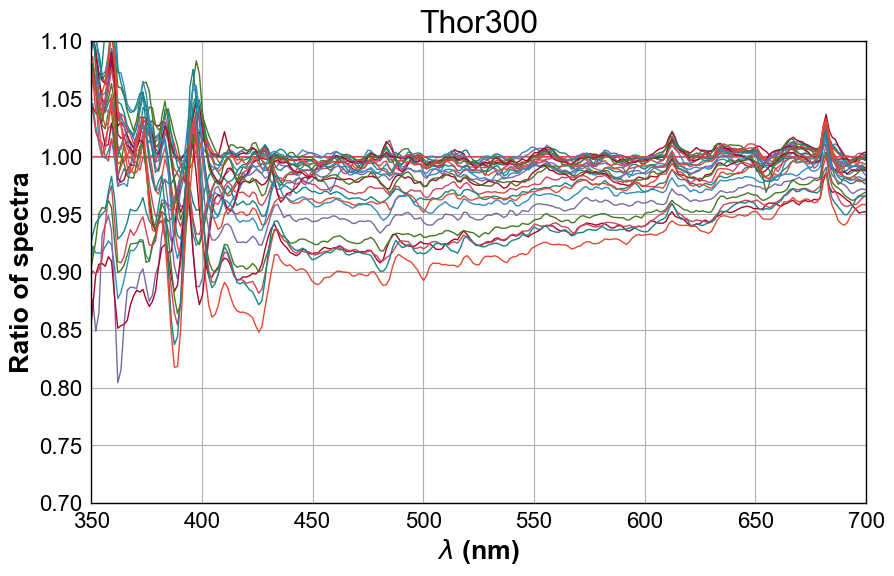

In [33]:
ShowSpectrumRatio(all_wl_Thor300,all_spec_Thor300,bp_Thor300,'Thor300',dir_top_images,'Thor300_ratio.pdf');

Warning, 19 of 1117 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 1119 bins contained negative fluxes; they have been set to zero.
Warning, 20 of 1121 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 1122 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 1125 bins contained negative fluxes; they have been set to zero.
Warning, 7 of 1128 bins contained negative fluxes; they have been set to zero.
Warning, 11 of 1129 bins contained negative fluxes; they have been set to zero.
Warning, 18 of 1131 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 1134 bins contained negative fluxes; they have been set to zero.
Warning, 13 of 1137 bins contained negative fluxes; they have been set to zero.
Warning, 14 of 1140 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 1144 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 1146 bins contained negative

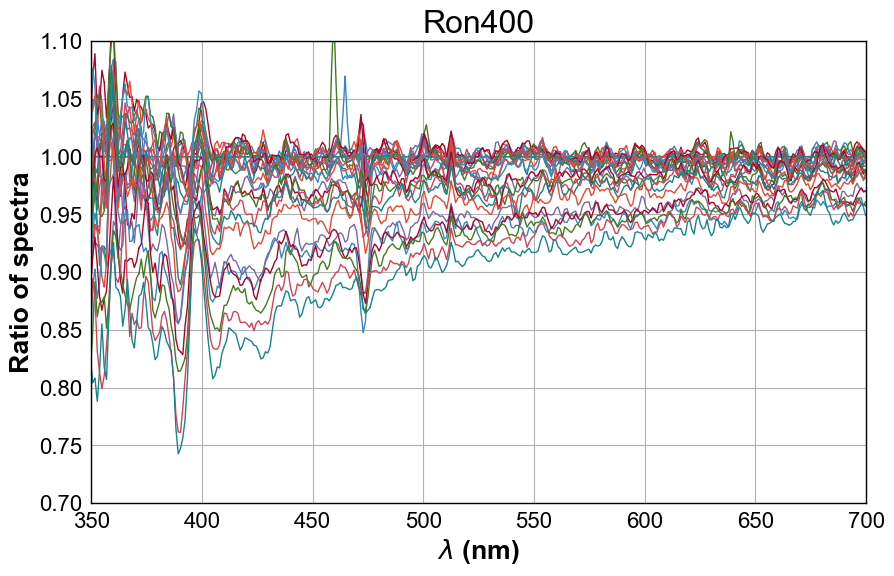

In [34]:
ShowSpectrumRatio(all_wl_Ron400,all_spec_Ron400,bp_Ron400,'Ron400',dir_top_images,'Ron400_ratio.pdf');

Warning, 10 of 1116 bins contained negative fluxes; they have been set to zero.
Warning, 11 of 1118 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 1120 bins contained negative fluxes; they have been set to zero.
Warning, 7 of 1121 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 1123 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 1129 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 1130 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 1131 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 1134 bins contained negative fluxes; they have been set to zero.
Warning, 7 of 1137 bins contained negative fluxes; they have been set to zero.
Warning, 7 of 1141 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 1143 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 1144 bins contained negative fluxes;

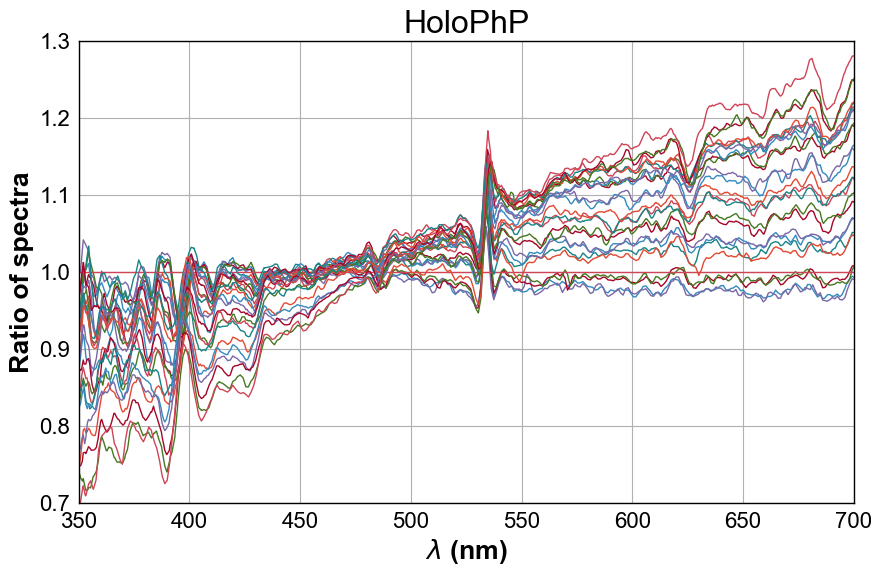

In [35]:
ShowSpectrumRatio(all_wl_HoloPhP,all_spec_HoloPhP,bp_HoloPhP,'HoloPhP',dir_top_images,'HoloPhP_ratio.pdf',YMAX=1.3);

Warning, 5 of 1112 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 1114 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 1116 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 1118 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 1121 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1125 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 1126 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1132 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 1134 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1138 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 1140 bins contained negative fluxes; they have been set to zero.
Warning, 2 of 1145 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 1161 bins contained negative fluxes; 

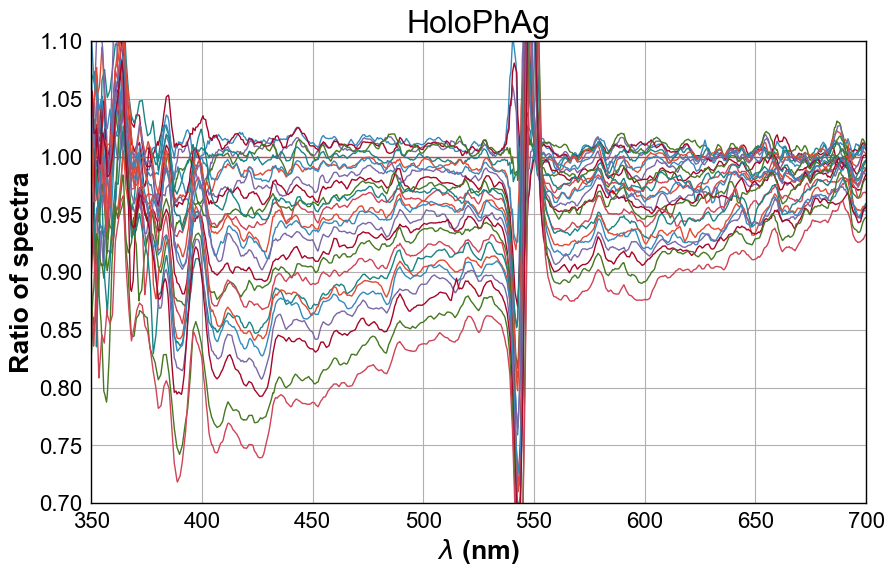

In [36]:
ShowSpectrumRatio(all_wl_HoloPhAg,all_spec_HoloPhAg,bp_HoloPhAg,'HoloPhAg',dir_top_images,'HoloPhAg_ratio.pdf');

Warning, 93 of 1114 bins contained negative fluxes; they have been set to zero.
Warning, 120 of 1116 bins contained negative fluxes; they have been set to zero.
Warning, 108 of 1119 bins contained negative fluxes; they have been set to zero.
Warning, 117 of 1122 bins contained negative fluxes; they have been set to zero.
Warning, 118 of 1124 bins contained negative fluxes; they have been set to zero.
Warning, 100 of 1127 bins contained negative fluxes; they have been set to zero.
Warning, 117 of 1128 bins contained negative fluxes; they have been set to zero.
Warning, 118 of 1131 bins contained negative fluxes; they have been set to zero.
Warning, 117 of 1135 bins contained negative fluxes; they have been set to zero.
Warning, 112 of 1137 bins contained negative fluxes; they have been set to zero.
Warning, 107 of 1140 bins contained negative fluxes; they have been set to zero.
Warning, 106 of 1141 bins contained negative fluxes; they have been set to zero.
Warning, 102 of 1145 bins con

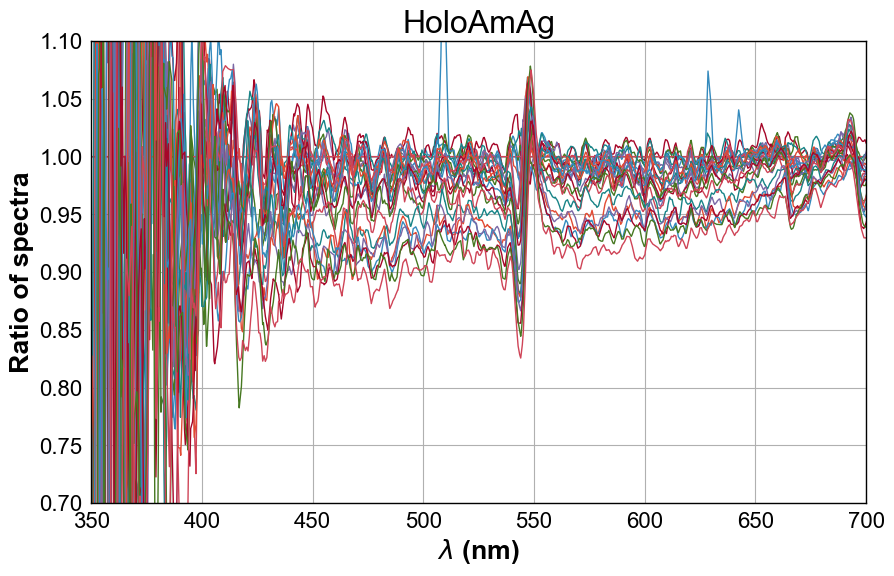

In [37]:
ShowSpectrumRatio(all_wl_HoloAmAg,all_spec_HoloAmAg,bp_HoloAmAg,'HoloAmAg',dir_top_images,'HoloAmAg_ratio.pdf');